# LEITURA E INDEXAÇÃO DA BIBLIOTECA

## LEITURA DO CSV E CRIAÇÃO DO DATAFRAME

In [3]:
import pandas as pd
from PIL import Image
import numpy as np
import os

# Carregar o novo arquivo CSV com os caminhos de imagem atualizados
data = pd.read_csv(r'E:\DRIVE_UFC\Meu Drive\IMGS_COMPLETO\ATRITO_COMPLETO_SINTETICO_EXTRAPOLADOS_jupyter.csv')

# Predefinir uma lista para armazenar as imagens e os coeficientes de atrito
images = []
coefs = []

# Definir o tamanho desejado para as imagens (ex: 66x66)
desired_size = (66, 66)

# Contador para a impressão de progresso
count = 0

for index, row in data.iterrows():
    try:
        # Carregar a imagem
        img = Image.open(row['image_path']).convert('RGB')
        
        # Redimensionar a imagem
        img = img.resize(desired_size)
        
        # Converter a imagem para um array numpy e normalizar os pixels
        img_array = np.array(img) / 255.0
        
        # Adicionar a imagem e o coeficiente de atrito às listas
        images.append(img_array)
        coefs.append(row['atrito'])

        # Incrementar o contador
        count += 1

        # Imprimir progresso a cada 100 imagens processadas
        if count % 100 == 0:
            print(f'{count} imagens processadas.')

    except Exception as e:
        print(f"Erro ao carregar a imagem {row['image_path']}: {e}")

# Converter listas para arrays numpy
images_array = np.array(images)
coefs_array = np.array(coefs)

print(f'Imagens carregadas: {images_array.shape}')
print(f'Coeficientes de atrito: {coefs_array.shape}')


100 imagens processadas.
200 imagens processadas.
300 imagens processadas.
400 imagens processadas.
500 imagens processadas.
600 imagens processadas.
700 imagens processadas.
800 imagens processadas.
900 imagens processadas.
1000 imagens processadas.
1100 imagens processadas.
1200 imagens processadas.
1300 imagens processadas.
1400 imagens processadas.
1500 imagens processadas.
1600 imagens processadas.
1700 imagens processadas.
1800 imagens processadas.
1900 imagens processadas.
2000 imagens processadas.
2100 imagens processadas.
2200 imagens processadas.
2300 imagens processadas.
2400 imagens processadas.
2500 imagens processadas.
2600 imagens processadas.
2700 imagens processadas.
2800 imagens processadas.
2900 imagens processadas.
3000 imagens processadas.
3100 imagens processadas.
3200 imagens processadas.
3300 imagens processadas.
3400 imagens processadas.
3500 imagens processadas.
3600 imagens processadas.
3700 imagens processadas.
3800 imagens processadas.
3900 imagens processa

30900 imagens processadas.
31000 imagens processadas.
31100 imagens processadas.
31200 imagens processadas.
31300 imagens processadas.
31400 imagens processadas.
31500 imagens processadas.
31600 imagens processadas.
31700 imagens processadas.
31800 imagens processadas.
31900 imagens processadas.
32000 imagens processadas.
32100 imagens processadas.
32200 imagens processadas.
32300 imagens processadas.
32400 imagens processadas.
32500 imagens processadas.
32600 imagens processadas.
32700 imagens processadas.
32800 imagens processadas.
32900 imagens processadas.
33000 imagens processadas.
Imagens carregadas: (33096, 66, 66, 3)
Coeficientes de atrito: (33096,)


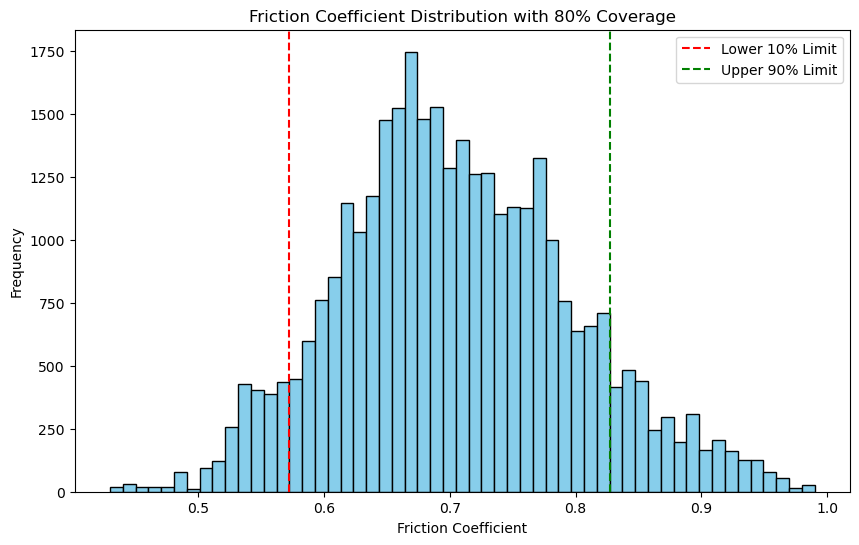

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming coefs_array is already defined as per your previous code

# Plot the histogram of the friction coefficients
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(coefs_array, bins=55, color='skyblue', edgecolor='black')

# Calculate the cumulative histogram (to find the 80% limits)
cumulative_hist = np.cumsum(hist) / sum(hist)

# Find the bin indices for the 10th and 90th percentiles
lower_limit_idx = np.where(cumulative_hist <= 0.1)[0][-1]
upper_limit_idx = np.where(cumulative_hist >= 0.9)[0][0]

# Draw vertical lines to mark the 80% data coverage
plt.axvline(x=bins[lower_limit_idx], color='red', linestyle='--', label='Lower 10% Limit')
plt.axvline(x=bins[upper_limit_idx], color='green', linestyle='--', label='Upper 90% Limit')

plt.title('Friction Coefficient Distribution with 80% Coverage')
plt.xlabel('Friction Coefficient')
plt.ylabel('Frequency')
plt.legend()

plt.show()


In [5]:
import pandas as pd
from PIL import Image
import numpy as np
import os

# Carregar o novo arquivo CSV com os caminhos de imagem atualizados
data = pd.read_csv(r'E:\DRIVE_UFC\Meu Drive\IMGS_COMPLETO\ATRITO_COMPLETO_SINTETICO_EXTRAPOLADOS_jupyter.csv')

# Predefinir listas para armazenar as imagens, os coeficientes de atrito e os nomes dos arquivos
images = []
coefs = []
filenames = []  # Lista para armazenar os nomes dos arquivos

# Definir o tamanho desejado para as imagens (ex: 66x66)
desired_size = (66, 66)

# Contador para a impressão de progresso
count = 0

for index, row in data.iterrows():
    try:
        # Carregar a imagem
        img = Image.open(row['image_path']).convert('RGB')
        
        # Redimensionar a imagem
        img = img.resize(desired_size)
        
        # Converter a imagem para um array numpy e normalizar os pixels
        img_array = np.array(img) / 255.0
        
        # Adicionar a imagem e o coeficiente de atrito às listas
        images.append(img_array)
        coefs.append(row['atrito'])
        filenames.append(os.path.basename(row['image_path']))  # Adicionar o nome do arquivo à lista

        # Incrementar o contador
        count += 1

        # Imprimir progresso a cada 100 imagens processadas
        if count % 100 == 0:
            print(f'{count} imagens processadas.')

    except Exception as e:
        print(f"Erro ao carregar a imagem {row['image_path']}: {e}")

# Converter listas para arrays numpy (se necessário para as imagens e coeficientes)
images_array = np.array(images)
coefs_array = np.array(coefs)

# Agora, você tem uma lista adicional `filenames` com os nomes dos arquivos das imagens
print(f'Imagens carregadas: {images_array.shape}')
print(f'Coeficientes de atrito: {coefs_array.shape}')
print(f'Nomes dos arquivos das imagens: {len(filenames)}')

# Se necessário, você pode criar um DataFrame com os nomes dos arquivos
df_filenames = pd.DataFrame({'filename': filenames})
print(df_filenames.head())


100 imagens processadas.
200 imagens processadas.
300 imagens processadas.
400 imagens processadas.
500 imagens processadas.
600 imagens processadas.
700 imagens processadas.
800 imagens processadas.
900 imagens processadas.
1000 imagens processadas.
1100 imagens processadas.
1200 imagens processadas.
1300 imagens processadas.
1400 imagens processadas.
1500 imagens processadas.
1600 imagens processadas.
1700 imagens processadas.
1800 imagens processadas.
1900 imagens processadas.
2000 imagens processadas.
2100 imagens processadas.
2200 imagens processadas.
2300 imagens processadas.
2400 imagens processadas.
2500 imagens processadas.
2600 imagens processadas.
2700 imagens processadas.
2800 imagens processadas.
2900 imagens processadas.
3000 imagens processadas.
3100 imagens processadas.
3200 imagens processadas.
3300 imagens processadas.
3400 imagens processadas.
3500 imagens processadas.
3600 imagens processadas.
3700 imagens processadas.
3800 imagens processadas.
3900 imagens processa

30900 imagens processadas.
31000 imagens processadas.
31100 imagens processadas.
31200 imagens processadas.
31300 imagens processadas.
31400 imagens processadas.
31500 imagens processadas.
31600 imagens processadas.
31700 imagens processadas.
31800 imagens processadas.
31900 imagens processadas.
32000 imagens processadas.
32100 imagens processadas.
32200 imagens processadas.
32300 imagens processadas.
32400 imagens processadas.
32500 imagens processadas.
32600 imagens processadas.
32700 imagens processadas.
32800 imagens processadas.
32900 imagens processadas.
33000 imagens processadas.
Imagens carregadas: (33096, 66, 66, 3)
Coeficientes de atrito: (33096,)
Nomes dos arquivos das imagens: 33096
                     filename
0  SBBE_2015-08-08_E6_100.png
1  SBBE_2015-08-08_E6_110.png
2  SBBE_2015-08-08_E6_120.png
3  SBBE_2015-08-08_E6_130.png
4  SBBE_2015-08-08_E6_140.png


In [3]:
import pandas as pd
import numpy as np
from PIL import Image
import os

# Supondo que os dados já foram carregados e as imagens processadas
# images e coefs são as listas contendo as imagens e coeficientes de atrito, respectivamente

# Criar um DataFrame com as imagens e coeficientes de atrito
df_images = pd.DataFrame({
    'image': images,
    'coefficient': coefs
})

# Exibir as primeiras linhas do DataFrame para confirmar a estrutura
print(df_images.head())

# Imprimir o número total de amostras no DataFrame
print(f"Total de amostras no DataFrame: {len(df_images)}")


                                               image  coefficient
0  [[[0.3764705882352941, 0.42745098039215684, 0....         0.76
1  [[[0.19607843137254902, 0.24313725490196078, 0...         0.76
2  [[[0.3568627450980392, 0.38823529411764707, 0....         0.76
3  [[[0.28627450980392155, 0.34509803921568627, 0...         0.76
4  [[[0.2823529411764706, 0.30980392156862746, 0....         0.76
Total de amostras no DataFrame: 33096


In [6]:
import pandas as pd
import numpy as np
from PIL import Image
import os

# Supondo que os dados já foram carregados e as imagens processadas
# images, coefs e filenames são as listas contendo as imagens, coeficientes de atrito e nomes dos arquivos, respectivamente

# Certifique-se de ter a lista de nomes dos arquivos das imagens
# Por exemplo:
# filenames = ['image1.jpg', 'image2.jpg', ..., 'imagen.jpg']

# Criar um DataFrame com as imagens, coeficientes de atrito e nomes dos arquivos
df_images = pd.DataFrame({
    'image': images,
    'coefficient': coefs,
    'filename': filenames  # Adicionando a coluna de nomes dos arquivos
})

# Exibir as primeiras linhas do DataFrame para confirmar a estrutura
print(df_images.head())

# Imprimir o número total de amostras no DataFrame
print(f"Total de amostras no DataFrame: {len(df_images)}")


                                               image  coefficient  \
0  [[[0.3764705882352941, 0.42745098039215684, 0....         0.76   
1  [[[0.19607843137254902, 0.24313725490196078, 0...         0.76   
2  [[[0.3568627450980392, 0.38823529411764707, 0....         0.76   
3  [[[0.28627450980392155, 0.34509803921568627, 0...         0.76   
4  [[[0.2823529411764706, 0.30980392156862746, 0....         0.76   

                     filename  
0  SBBE_2015-08-08_E6_100.png  
1  SBBE_2015-08-08_E6_110.png  
2  SBBE_2015-08-08_E6_120.png  
3  SBBE_2015-08-08_E6_130.png  
4  SBBE_2015-08-08_E6_140.png  
Total de amostras no DataFrame: 33096


## EXPORTAÇÃO DO NPY PARA REGRESSÃO LINEAR

In [7]:
import numpy as np

# Definindo os caminhos dos arquivos onde os dados serão salvos
images_path = 'images_array.npy'
coefs_path = 'coefs_array.npy'

# Salvando os arrays de imagens e coeficientes
np.save(images_path, images_array)
np.save(coefs_path, coefs_array)

print('Arrays salvos com sucesso!')

## EXPORTAÇÃO DO NPY PARA CLASSIFICAÇÃO DIVIDINDO EM 4 CLUSTERS (QUANTIDADES DE AMOSTRAS UNIFORMES)

In [8]:
import pandas as pd
import numpy as np
from PIL import Image
import os

# Carregar o DataFrame
data_path = r'E:\DRIVE_UFC\Meu Drive\IMGS_COMPLETO\ATRITO_COMPLETO_SINTETICO_EXTRAPOLADOS_jupyter.csv'
data = pd.read_csv(data_path)

# Dividir em 4 clusters baseado na coluna 'atrito'
data['cluster'] = pd.qcut(data['atrito'], q=4, labels=False)

# Preparar listas para armazenar imagens, identificadores de cluster e nomes dos arquivos
images = []
clusters = []
filenames = []  # Lista para os nomes dos arquivos

# Definir o tamanho desejado para as imagens (ex: 66x66)
desired_size = (66, 66)

# Contador para a impressão de progresso
count = 0

for index, row in data.iterrows():
    try:
        # Carregar e processar a imagem
        img = Image.open(row['image_path']).convert('RGB')
        img = img.resize(desired_size)
        img_array = np.array(img) / 255.0

        # Adicionar a imagem processada, o identificador do cluster e o nome do arquivo às listas
        images.append(img_array)
        clusters.append(row['cluster'])
        filenames.append(os.path.basename(row['image_path']))  # Adicionar o nome do arquivo à lista

        # Incrementar o contador
        count += 1

        # Imprimir progresso a cada 100 imagens processadas
        if count % 100 == 0:
            print(f'{count} imagens processadas.')

    except Exception as e:
        print(f"Erro ao carregar a imagem {row['image_path']}: {e}")

# Converter listas para arrays numpy
images_array = np.array(images)
clusters_array = np.array(clusters)
filenames_array = np.array(filenames)  # Converter a lista de nomes dos arquivos em um array NumPy

# Exportar para arquivos NPY
np.save('images_by_cluster.npy', images_array)
np.save('clusters.npy', clusters_array)
np.save('filenames.npy', filenames_array)  # Salvar o array de nomes dos arquivos

print('Arrays de imagens, clusters e nomes dos arquivos salvos com sucesso!')
print(f'Total de imagens processadas: {count}')


100 imagens processadas.
200 imagens processadas.
300 imagens processadas.
400 imagens processadas.
500 imagens processadas.
600 imagens processadas.
700 imagens processadas.
800 imagens processadas.
900 imagens processadas.
1000 imagens processadas.
1100 imagens processadas.
1200 imagens processadas.
1300 imagens processadas.
1400 imagens processadas.
1500 imagens processadas.
1600 imagens processadas.
1700 imagens processadas.
1800 imagens processadas.
1900 imagens processadas.
2000 imagens processadas.
2100 imagens processadas.
2200 imagens processadas.
2300 imagens processadas.
2400 imagens processadas.
2500 imagens processadas.
2600 imagens processadas.
2700 imagens processadas.
2800 imagens processadas.
2900 imagens processadas.
3000 imagens processadas.
3100 imagens processadas.
3200 imagens processadas.
3300 imagens processadas.
3400 imagens processadas.
3500 imagens processadas.
3600 imagens processadas.
3700 imagens processadas.
3800 imagens processadas.
3900 imagens processa

30900 imagens processadas.
31000 imagens processadas.
31100 imagens processadas.
31200 imagens processadas.
31300 imagens processadas.
31400 imagens processadas.
31500 imagens processadas.
31600 imagens processadas.
31700 imagens processadas.
31800 imagens processadas.
31900 imagens processadas.
32000 imagens processadas.
32100 imagens processadas.
32200 imagens processadas.
32300 imagens processadas.
32400 imagens processadas.
32500 imagens processadas.
32600 imagens processadas.
32700 imagens processadas.
32800 imagens processadas.
32900 imagens processadas.
33000 imagens processadas.
Arrays de imagens, clusters e nomes dos arquivos salvos com sucesso!
Total de imagens processadas: 33096


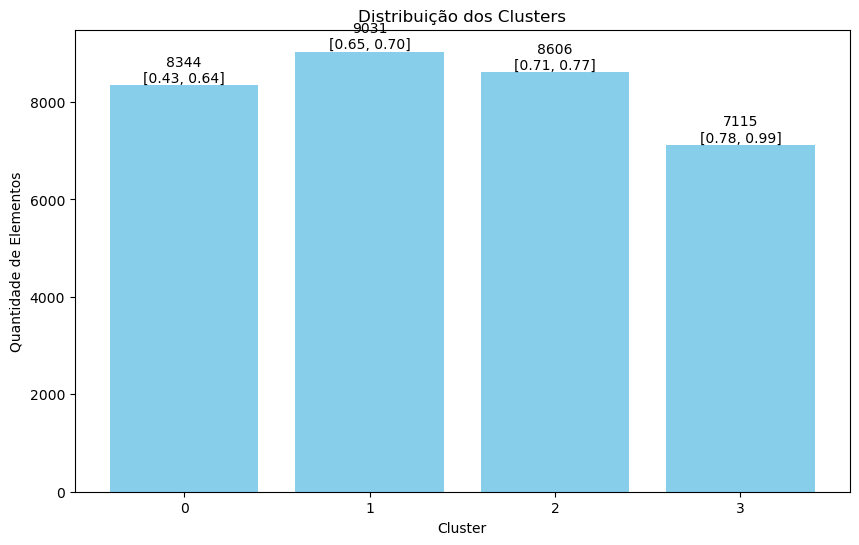

In [9]:
import matplotlib.pyplot as plt

# Supondo que 'data' é o seu DataFrame e que ele já contém a coluna 'cluster'
# e a coluna 'coefs' (ou 'atrito', conforme seu exemplo inicial)

# Contar a quantidade de elementos em cada cluster
cluster_counts = data['cluster'].value_counts().sort_index()

# Obter os limites de 'coefs' para cada cluster
cluster_limits = data.groupby('cluster')['atrito'].agg(['min', 'max'])

# Criar o histograma
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')

plt.title('Distribuição dos Clusters')
plt.xlabel('Cluster')
plt.ylabel('Quantidade de Elementos')
plt.xticks(cluster_counts.index)  # Garante que os rótulos dos eixos x correspondam aos clusters

# Anotar a quantidade de elementos e os limites de 'coefs' em cada barra
for idx, (bar, count) in enumerate(zip(bars, cluster_counts.values)):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval,
             f'{count}\n[{cluster_limits["min"][idx]:.2f}, {cluster_limits["max"][idx]:.2f}]',
             ha='center', va='bottom')

# Exibir o histograma
plt.show()


## EXPORTAÇÃO DO NPY PARA CLASSIFICAÇÃO DIVIDINDO EM 4 CLUSTERS (80% DOS PERCENTIS CENTRAIS)

In [35]:
import pandas as pd
import numpy as np
from PIL import Image
import os

# Carregar o DataFrame
data_path = r'E:\DRIVE_UFC\Meu Drive\IMGS_COMPLETO\ATRITO_COMPLETO_SINTETICO_EXTRAPOLADOS_jupyter.csv'
data = pd.read_csv(data_path)

# Calcular os percentis 10% e 90% para a coluna 'atrito'
lower_bound = data['atrito'].quantile(0.10)
upper_bound = data['atrito'].quantile(0.90)

# Filtrar os dados para incluir apenas o intervalo central de 80% e criar uma cópia independente do DataFrame
data_filtered = data[(data['atrito'] >= lower_bound) & (data['atrito'] <= upper_bound)].copy()

# Dividir os dados filtrados em 4 clusters baseado na coluna 'atrito' e evitar o aviso
data_filtered.loc[:, 'cluster'] = pd.qcut(data_filtered['atrito'], q=4, labels=False, duplicates='drop')

# Preparar listas para armazenar imagens, identificadores de cluster e nomes dos arquivos
images = []
clusters = []
filenames = []  # Lista para os nomes dos arquivos

# Definir o tamanho desejado para as imagens (ex: 66x66)
desired_size = (66, 66)

# Contador para a impressão de progresso
count = 0

for index, row in data_filtered.iterrows():
    try:
        # Carregar e processar a imagem
        img = Image.open(row['image_path']).convert('RGB')
        img = img.resize(desired_size)
        img_array = np.array(img) / 255.0

        # Adicionar a imagem processada, o identificador do cluster e o nome do arquivo às listas
        images.append(img_array)
        clusters.append(row['cluster'])
        filenames.append(os.path.basename(row['image_path']))  # Adicionar o nome do arquivo à lista

        # Incrementar o contador
        count += 1

        # Imprimir progresso a cada 100 imagens processadas
        if count % 100 == 0:
            print(f'{count} imagens processadas.')

    except Exception as e:
        print(f"Erro ao carregar a imagem {row['image_path']}: {e}")

# Converter listas para arrays numpy
images_array = np.array(images)
clusters_array = np.array(clusters)
filenames_array = np.array(filenames)  # Converter a lista de nomes dos arquivos em um array NumPy

# Exportar para arquivos NPY
np.save('images_by_cluster_80.npy', images_array)
np.save('clusters_80.npy', clusters_array)
np.save('filenames_80.npy', filenames_array)  # Salvar o array de nomes dos arquivos

print('Arrays de imagens, clusters e nomes dos arquivos salvos com sucesso!')
print(f'Total de imagens processadas: {count}')


100 imagens processadas.
200 imagens processadas.
300 imagens processadas.
400 imagens processadas.
500 imagens processadas.
600 imagens processadas.
700 imagens processadas.
800 imagens processadas.
900 imagens processadas.
1000 imagens processadas.
1100 imagens processadas.
1200 imagens processadas.
1300 imagens processadas.
1400 imagens processadas.
1500 imagens processadas.
1600 imagens processadas.
1700 imagens processadas.
1800 imagens processadas.
1900 imagens processadas.
2000 imagens processadas.
2100 imagens processadas.
2200 imagens processadas.
2300 imagens processadas.
2400 imagens processadas.
2500 imagens processadas.
2600 imagens processadas.
2700 imagens processadas.
2800 imagens processadas.
2900 imagens processadas.
3000 imagens processadas.
3100 imagens processadas.
3200 imagens processadas.
3300 imagens processadas.
3400 imagens processadas.
3500 imagens processadas.
3600 imagens processadas.
3700 imagens processadas.
3800 imagens processadas.
3900 imagens processa

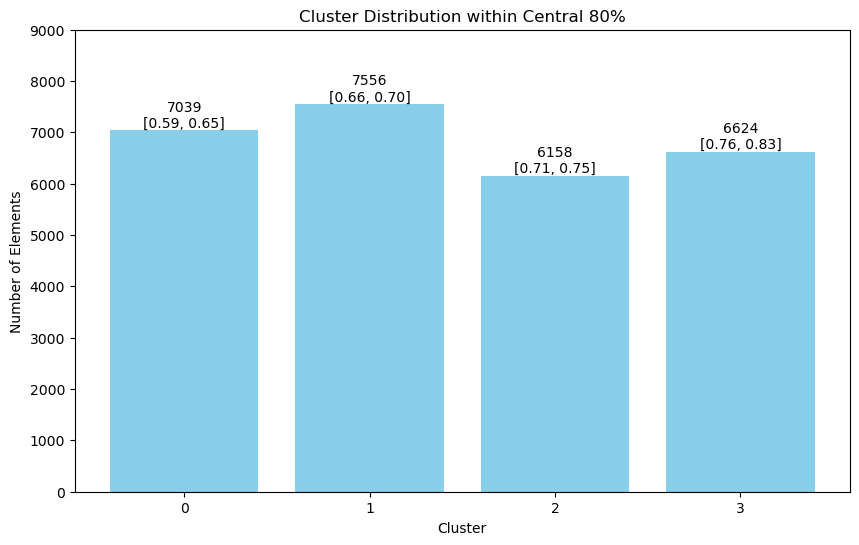

In [39]:
import matplotlib.pyplot as plt

# Supondo que 'data_filtered' é o seu DataFrame que contém apenas as amostras dentro do intervalo central de 80%
# e que ele já contém a coluna 'cluster' resultante da divisão em clusters

# Contar a quantidade de elementos em cada cluster
cluster_counts = data_filtered['cluster'].value_counts().sort_index()

# Obter os limites de 'atrito' para cada cluster
cluster_limits = data_filtered.groupby('cluster')['atrito'].agg(['min', 'max'])

# Criar o histograma
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')

plt.title('Cluster Distribution within Central 80%')
plt.xlabel('Cluster')
plt.ylabel('Number of Elements')
plt.xticks(cluster_counts.index)  # Garante que os rótulos dos eixos x correspondam aos clusters
plt.ylim(0, 9000)  # Set the maximum limit of the y-axis grid to 9000

# Anotar a quantidade de elementos e os limites de 'atrito' em cada barra
for idx, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval,
             f'{cluster_counts.values[idx]}\n[{cluster_limits["min"].iloc[idx]:.2f}, {cluster_limits["max"].iloc[idx]:.2f}]',
             ha='center', va='bottom', fontsize=10)

# Exibir o histograma
plt.show()


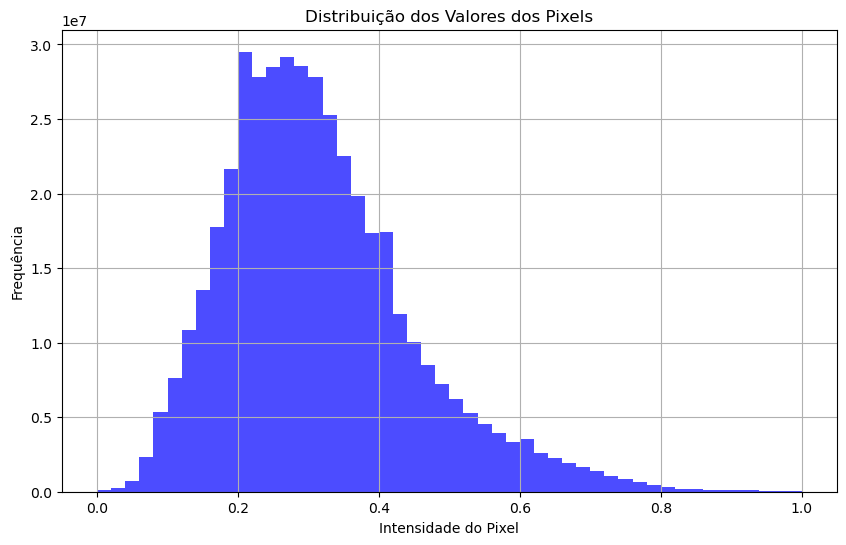

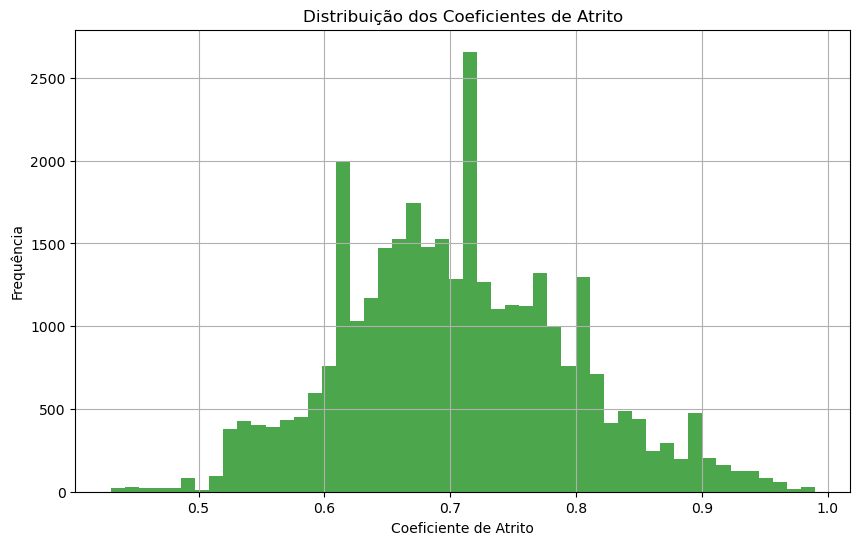

In [4]:
#APRESENTAÇÃO DOS HISTOGRAMAS

import matplotlib.pyplot as plt
import numpy as np

# Histograma dos valores dos pixels
# Concatenar todos os arrays de imagem para criar uma lista única de valores de pixels
all_pixels = np.concatenate([img.flatten() for img in df_images['image']])

# Plotar o histograma dos valores dos pixels
plt.figure(figsize=(10, 6))
plt.hist(all_pixels, bins=50, color='blue', alpha=0.7)
plt.title('Distribuição dos Valores dos Pixels')
plt.xlabel('Intensidade do Pixel')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Histograma dos Coeficientes de Atrito
plt.figure(figsize=(10, 6))
plt.hist(df_images['coefficient'], bins=50, color='green', alpha=0.7)
plt.title('Distribuição dos Coeficientes de Atrito')
plt.xlabel('Coeficiente de Atrito')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


# BALANCEAMENTO DOS DADOS

## UNDERSAMPLING

Total samples after undersampling: 570


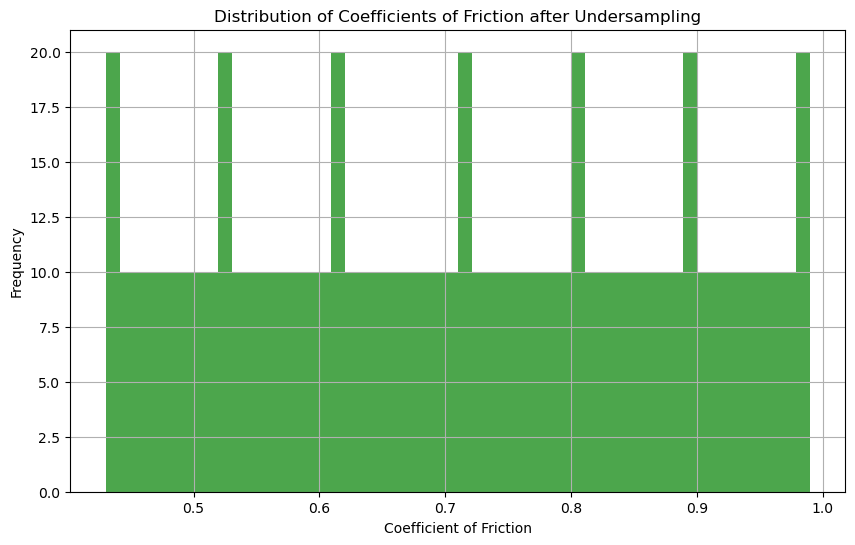

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import resample

# Supondo que df_images e image_data estejam definidos anteriormente

# Identificando a classe minoritária
min_count = df_images['coefficient'].value_counts().min()

# DataFrame para dados balanceados por undersampling
df_undersampled = pd.DataFrame()

# Lista para armazenar as imagens subamostradas
images_undersampled = []

# Iterando sobre cada classe e realizando undersampling
for coef in df_images['coefficient'].unique():
    df_class = df_images[df_images['coefficient'] == coef]
    df_class_undersampled = resample(df_class, replace=False, n_samples=min_count, random_state=123)
    df_undersampled = pd.concat([df_undersampled, df_class_undersampled])
    
    # Selecionando imagens subamostradas correspondentes
    for idx in df_class_undersampled.index:
        images_undersampled.append(image_data[idx])

# Imprimindo o número total de amostras após undersampling
print(f"Total samples after undersampling: {len(df_undersampled)}")

# Plotando o histograma dos coeficientes de atrito após undersampling
plt.figure(figsize=(10, 6))
plt.hist(df_undersampled['coefficient'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Coefficients of Friction after Undersampling')
plt.xlabel('Coefficient of Friction')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Convertendo o DataFrame para um array NumPy
coefs_undersampled = df_undersampled['coefficient'].values

# Salvando os coeficientes de atrito em um arquivo .npy
np.save('coefs_undersampled.npy', coefs_undersampled)

# Convertendo a lista de imagens subamostradas para um array NumPy e salvando
np.save('images_undersampled.npy', np.array(images_undersampled))


## OVERSAMPLING

Total de amostras após oversampling: 99522


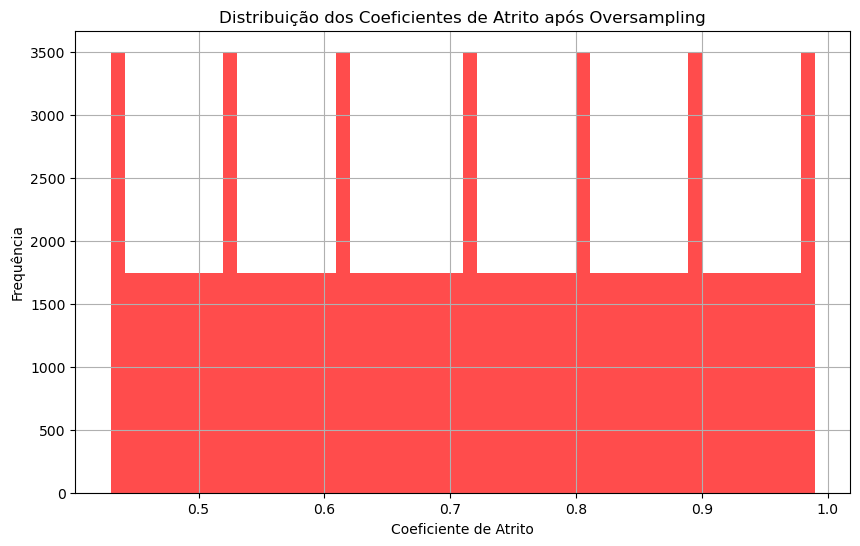

In [25]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Identificar a classe majoritária
max_count = df_images['coefficient'].value_counts().max()

# DataFrame para dados balanceados por oversampling
df_oversampled = pd.DataFrame()

# Iterar sobre cada classe e realizar o oversampling
for coef in df_images['coefficient'].unique():
    df_class = df_images[df_images['coefficient'] == coef]
    df_class_oversampled = resample(df_class, replace=True, n_samples=max_count, random_state=123)
    df_oversampled = pd.concat([df_oversampled, df_class_oversampled])

# Imprimir o número total de amostras após o oversampling
print(f"Total de amostras após oversampling: {len(df_oversampled)}")

# Plotar o histograma dos coeficientes de atrito após o oversampling
plt.figure(figsize=(10, 6))
plt.hist(df_oversampled['coefficient'], bins=50, color='red', alpha=0.7)
plt.title('Distribuição dos Coeficientes de Atrito após Oversampling')
plt.xlabel('Coeficiente de Atrito')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Converting the DataFrame to a NumPy array
coefs_oversampled = df_oversampled['coefficient'].values

# Saving the coefficients of friction to an .npy file
np.save('coefs_oversampled.npy', coefs_oversampled)

# Assuming 'image_data' is a separate array or dataset containing image data
# Saving the image data to an .npy file
np.save('image_data_oversampled.npy', np.array(images))


## BALANCEAMENTO POR CLUSTERS

Número ideal de clusters: 1
Quantidade de amostras em cada cluster:
cluster
0    33096
Name: count, dtype: int64


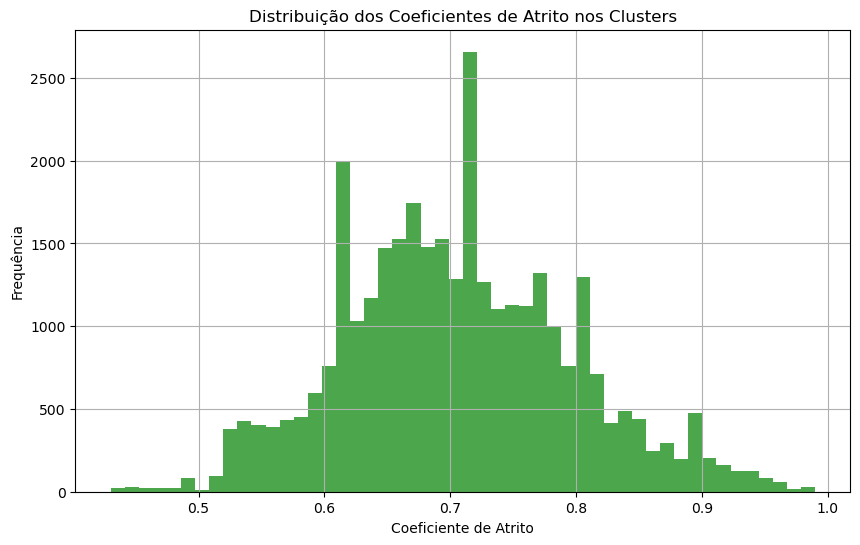

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definir o número máximo de clusters desejado
num_clusters_max = 10

# Inicializar variáveis para encontrar o número ideal de clusters
inertia_values = []

# Calcular a inércia (soma das distâncias quadradas dentro de cada cluster) para diferentes números de clusters
for num_clusters in range(1, num_clusters_max + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=123, n_init=10)  # Definir n_init explicitamente
    kmeans.fit(df_images[['coefficient']])
    inertia_values.append(kmeans.inertia_)

# Calcular as diferenças entre os valores de inércia consecutivos
inertia_differences = [inertia_values[i - 1] - inertia_values[i] for i in range(1, len(inertia_values))]

# Encontrar o número ideal de clusters com base na mudança na inércia
optimal_num_clusters = np.argmax(inertia_differences) + 1

# Criar o K-Means com o número ideal de clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=123, n_init=10)  # Definir n_init explicitamente
df_images['cluster'] = kmeans.fit_predict(df_images[['coefficient']])

# Imprimir o número ideal de clusters
print(f'Número ideal de clusters: {optimal_num_clusters}')

# Imprimir a quantidade de amostras em cada cluster
cluster_counts = df_images['cluster'].value_counts().sort_index()
print('Quantidade de amostras em cada cluster:')
print(cluster_counts)

# Plotar o histograma dos coeficientes de atrito nos clusters
plt.figure(figsize=(10, 6))
plt.hist(df_images['coefficient'], bins=50, color='green', alpha=0.7)
plt.title('Distribuição dos Coeficientes de Atrito nos Clusters')
plt.xlabel('Coeficiente de Atrito')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Salvar o DataFrame com os clusters em um arquivo CSV
df_images.to_csv('df_clusters.csv', index=False)

# Salvar as imagens e coeficientes em arquivos npy
np.save('image_data.npy', df_images['image'].values)
np.save('coefs.npy', df_images['coefficient'].values)


In [48]:
from sklearn.cluster import KMeans
import numpy as np

# Supondo que 'df_images' contém a coluna 'coefficient' com os coeficientes de atrito
# e 'image' com as imagens correspondentes

# Definir o número de clusters
n_clusters = 5  # Ajuste esse número conforme necessário

# Inicializar o KMeans com o número desejado de clusters e especificar n_init
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Fit KMeans usando os coeficientes de atrito
# Reshape é necessário pois kmeans espera um array 2D
clusters = kmeans.fit_predict(df_images['coefficient'].values.reshape(-1, 1))

# Adicionar os labels dos clusters ao DataFrame
df_images['cluster'] = clusters


In [49]:
# Determinar o tamanho do menor cluster
min_cluster_size = df_images['cluster'].value_counts().min()

# DataFrame para os dados balanceados
df_balanced_clusters = pd.DataFrame()

# Balancear os dados para cada cluster
for cluster in range(n_clusters):
    cluster_subset = df_images[df_images['cluster'] == cluster]
    balanced_subset = cluster_subset.sample(n=min_cluster_size, replace=True, random_state=42)
    df_balanced_clusters = pd.concat([df_balanced_clusters, balanced_subset])

# Resetar o índice do DataFrame balanceado
df_balanced_clusters.reset_index(drop=True, inplace=True)


          min   max
cluster            
0        0.74  0.82
1        0.43  0.59
2        0.67  0.73
3        0.83  0.99
4        0.60  0.66


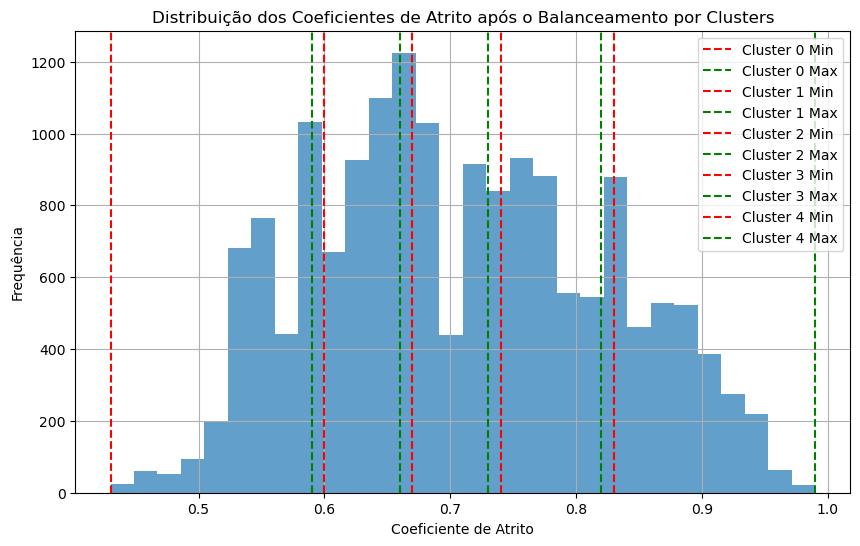

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você já tenha realizado a etapa 2 e tenha o DataFrame 'df_balanced_clusters' com os dados balanceados

# Calcular e imprimir os limites de cada cluster
cluster_limits = df_balanced_clusters.groupby('cluster')['coefficient'].agg(['min', 'max'])
print(cluster_limits)

# Histograma dos coeficientes de atrito após o balanceamento
plt.figure(figsize=(10, 6))
plt.hist(df_balanced_clusters['coefficient'], bins=30, alpha=0.7)
plt.title('Distribuição dos Coeficientes de Atrito após o Balanceamento por Clusters')
plt.xlabel('Coeficiente de Atrito')
plt.ylabel('Frequência')
plt.grid(True)

# Adicionar linhas verticais indicando os limites de cada cluster
for cluster, limits in cluster_limits.iterrows():
    plt.axvline(limits['min'], color='r', linestyle='--', label=f'Cluster {cluster} Min')
    plt.axvline(limits['max'], color='g', linestyle='--', label=f'Cluster {cluster} Max')

plt.legend()
plt.show()


In [1]:
#RECUPERAÇÃO DA IMAGEM A PARTIR DO DATAFRAME

import matplotlib.pyplot as plt

# Acessar a imagem na posição 3 do DataFrame
# O índice em Python começa em 0, então a posição 3 é acessada com índice 2
image_array = df_images.at[2197, 'image']

# Exibir a imagem
plt.imshow(image_array)
plt.axis('off')  # Desligar os eixos para uma visualização mais clara
plt.show()


NameError: name 'df_images' is not defined